In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


def pintar_funcion_densidad(distribucion, tipo):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(distribucion.ppf(0.01), distribucion.ppf(0.99) + 1)
    if tipo == 'discreta':
        ax.plot(x, distribucion.pmf(x), 'bo', ms=8)
        ax.vlines(x, 0, distribucion.pmf(x), colors='b', lw=5, alpha=0.5)
    elif tipo == 'continua':
        ax.plot(x, distribucion.pdf(x), 'bo', ms=2)
    else:
        assert False, 'Indique un tipo de distribución válido'
    plt.show()


def pintar_funcion_distribucion(distribucion, tipo='discreta'):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(distribucion.ppf(0.01), distribucion.ppf(0.99) + 1)
    ax.plot(x, distribucion.cdf(x), 'bo', ms=8)
    if tipo == 'discreta':
        ax.vlines(x, 0, distribucion.cdf(x), colors='b', lw=5, alpha=0.5)
    plt.show()


def pintar_histograma(muestras, titulo='Histograma', bins=0):
    if bins == 0:
        bins = range(int(min(muestras)), int(max(muestras)) + 2)
    plt.hist(muestras, bins=bins)
    plt.title(titulo)
    plt.show()


def pintar_lineas(frecuencia_relativa, labels, titulo='Frecuencias relativas de trayectos de k paradas'):
    for f, l in zip(frecuencia_relativa, labels):
        plt.plot(f, label=l)
    plt.legend()
    plt.xticks(np.arange(len(frecuencia_relativa[0])))
    plt.title(titulo)
    plt.show()


def pintar_histograma_conjunto(variable_x,
                               variable_y,
                               bins,
                               titulo='Histograma conjunto',
                               xlabel='Variable X',
                               ylabel='Variable Y'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].hist2d(variable_x, variable_y, bins=bins)
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].set_title('Histograma 2D conjunto')

    ax[1].hist(variable_x, bins=bins, label=xlabel, color='blue', alpha=0.5)
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel('Frecuencia')
    ax[1].set_title('Histograma conjunto')
    ax2 = ax[1].twiny()
    ax2.hist(variable_y, bins=50, label=ylabel, color='red', alpha=0.5)
    ax2.set_xlabel(ylabel)

    fig.suptitle(titulo)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

In [2]:
#Apartado A
n_desplazamientos = 100000

N_residentes = random.poisson(lam=1,size=n_desplazamientos)
N_visitantes = random.poisson(lam=4,size=n_desplazamientos)


D_residentes = []
D_visitantes = []
for i in range(n_desplazamientos):

    paradas_res = []
    for e in range(N_residentes[i]):
        paradas_res.append(random.exponential(3))
    else:
        D_residentes.append(paradas_res)
    paradas_vis = []
    for e in range(N_visitantes[i]):
        paradas_vis.append(random.exponential(3))
    else:
        D_visitantes.append(paradas_vis)

# D_residentes_sumado = []
# D_visitantes_sumado = []
# for i in range(n_desplazamientos):

#     paradas_res = 0
#     for i in range(random.poisson(1)):
#         paradas_res += random.exponential(3)
#     else:
#         D_residentes_sumado.append(paradas_res)
#     paradas_vis = 0
#     for i in range(random.poisson(4)):
#         paradas_vis += random.exponential(3)
#     else:
#         D_visitantes_sumado.append(paradas_vis)

In [3]:
#Apartado B
# lista_desp_sumado = D_visitantes_sumado[:20000]+D_residentes_sumado[20000:]
lista_desp = D_visitantes[:20000] + D_residentes[:80000]
lista_combinada = ['v'] * 20000 + ['r']*80000

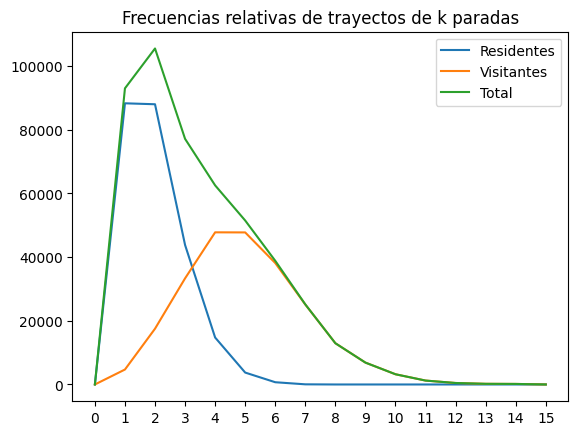

In [4]:
#Apartado C
fr_trayectos_k_paradas = [[], [], []]
rango = range(max(max(N_residentes),max(N_visitantes)))

for k in rango:
    frecuencia_rel_residentes = 0
    frecuencia_rel_visitantes = 0
    frecuencia_relativa_total = 0
    contador_res = 0
    contador_vis = 0

    for tiempos,viajero in zip(lista_desp,lista_combinada):
        if len(tiempos) == k:

            if viajero == 'v':
                contador_vis += 1
                frecuencia_rel_visitantes += sum(np.asanyarray(tiempos))
            else:
                contador_res += 1
                frecuencia_rel_residentes += sum(np.asanyarray(tiempos))
    frecuencia_relativa_total = frecuencia_rel_residentes + frecuencia_rel_visitantes
    contador_tot = contador_vis +contador_res
    # print('\n K = ' + str(k) + ' paradas')
    # print('Frecuencia relativa de trayectos de ' + str(k) + ' paradas (residentes): ' + str(frecuencia_rel_residentes/(1 if contador_res == 0 else contador_res)))
    # print('Frecuencia relativa de trayectos de ' + str(k) + ' paradas (visitantes): ' + str(frecuencia_rel_visitantes/(1 if contador_vis == 0 else contador_vis)))
    # print('Frecuencia relativa de trayectos de ' + str(k) + ' paradas (total): ' + str(frecuencia_relativa_total/(1 if contador_tot == 0 else contador_tot)))

    fr_trayectos_k_paradas[0].append(frecuencia_rel_residentes)
    fr_trayectos_k_paradas[1].append(frecuencia_rel_visitantes)
    fr_trayectos_k_paradas[2].append(frecuencia_relativa_total)

    # plot de las frecuencias relativas
pintar_lineas(frecuencia_relativa=fr_trayectos_k_paradas ,labels=['Residentes','Visitantes','Total'])

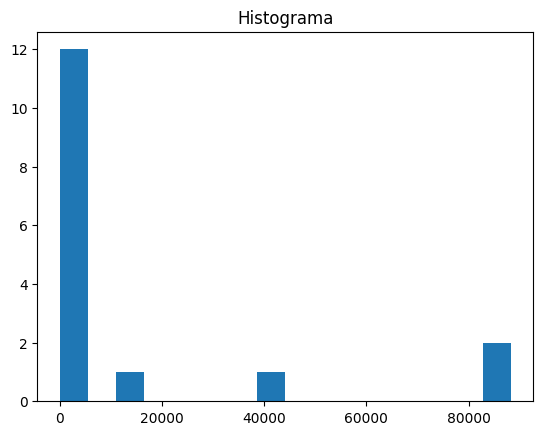

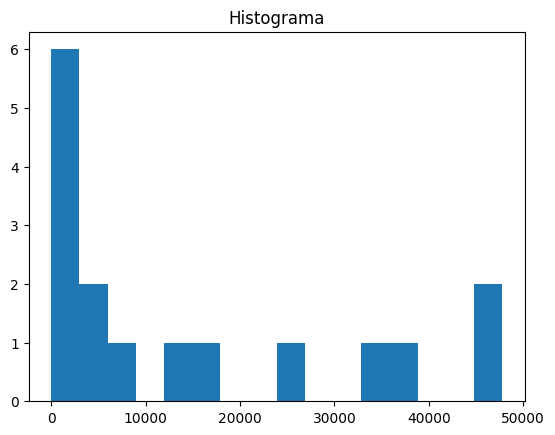

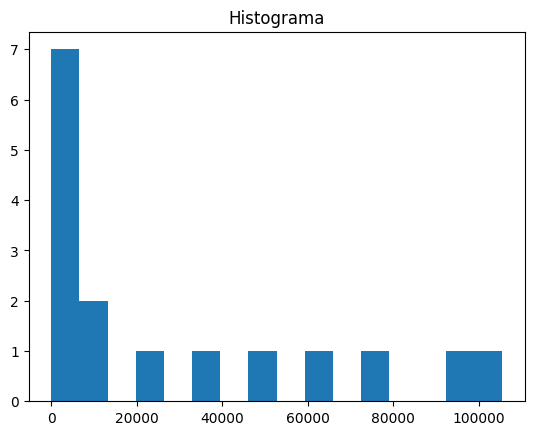

In [5]:
#Apartado D
for hist in fr_trayectos_k_paradas:
    pintar_histograma(hist,bins=max(max(N_residentes),max(N_visitantes)))

In [6]:
#Apartado E
suma_trayectos = []
for tray,viajero in zip(lista_desp,lista_combinada):
   
    if viajero == 'r':
        suma_trayectos.append(sum(np.asanyarray(tray)))
else:
    print(np.mean(suma_trayectos))
    print(np.std(suma_trayectos))

2.9905865781075414
4.235696112369922


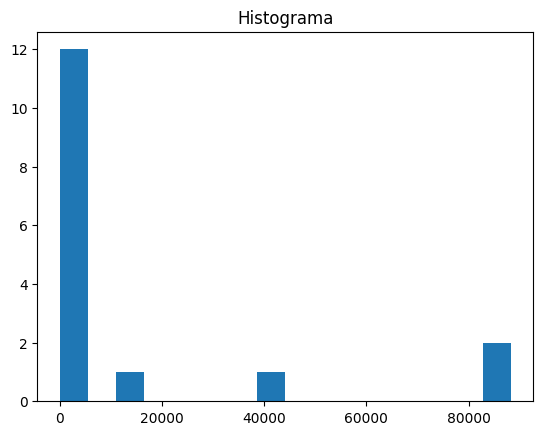

In [7]:
# Apartado F

pintar_histograma(fr_trayectos_k_paradas[0],bins=max(max(N_residentes),max(N_visitantes)))

In [8]:
suma_trayectos_vis = []
for tray,viajero in zip(lista_desp,lista_combinada):
   
    if viajero == 'v':
        suma_trayectos_vis.append(sum(np.asanyarray(tray)))
else:
    print(np.mean(suma_trayectos_vis))
    print(np.std(suma_trayectos_vis))

11.968690557559905
8.403697999712461


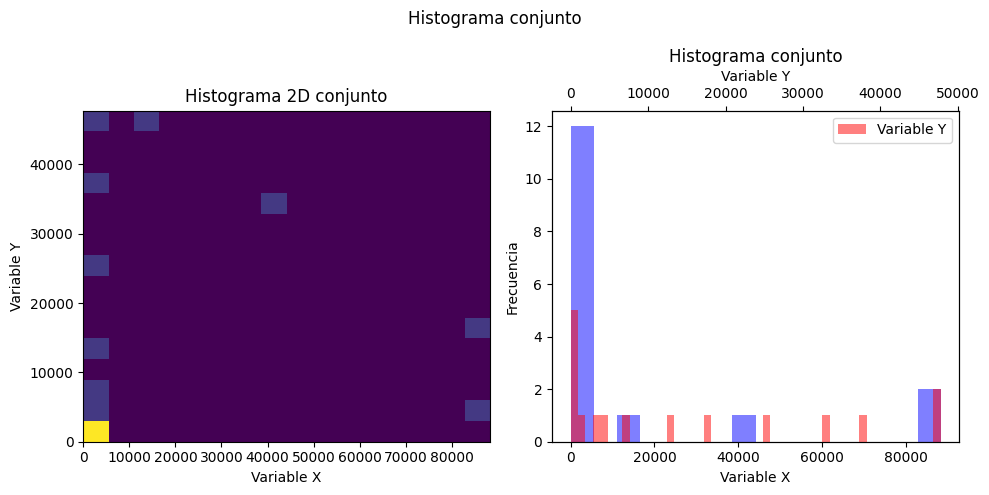

In [9]:
pintar_histograma_conjunto(fr_trayectos_k_paradas[0],fr_trayectos_k_paradas[1],bins=16)

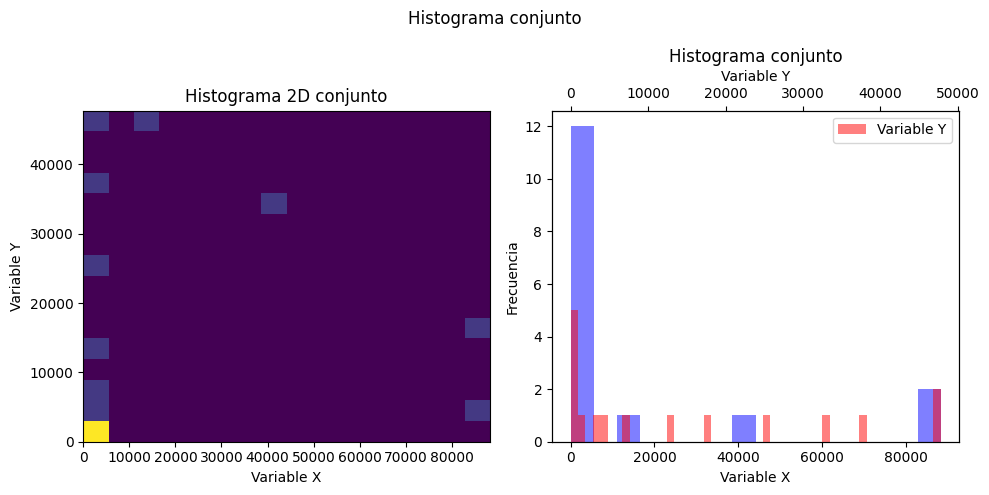

In [10]:
# Apartado H

pintar_histograma_conjunto(fr_trayectos_k_paradas[0],fr_trayectos_k_paradas[1],bins=16)

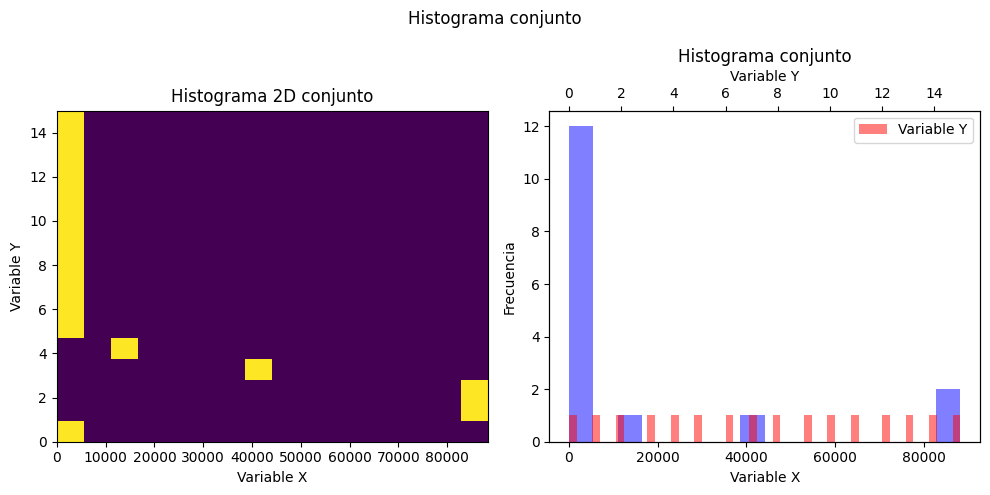

In [11]:
# Apartado H

pintar_histograma_conjunto(fr_trayectos_k_paradas[0],np.arange(16),bins=16)

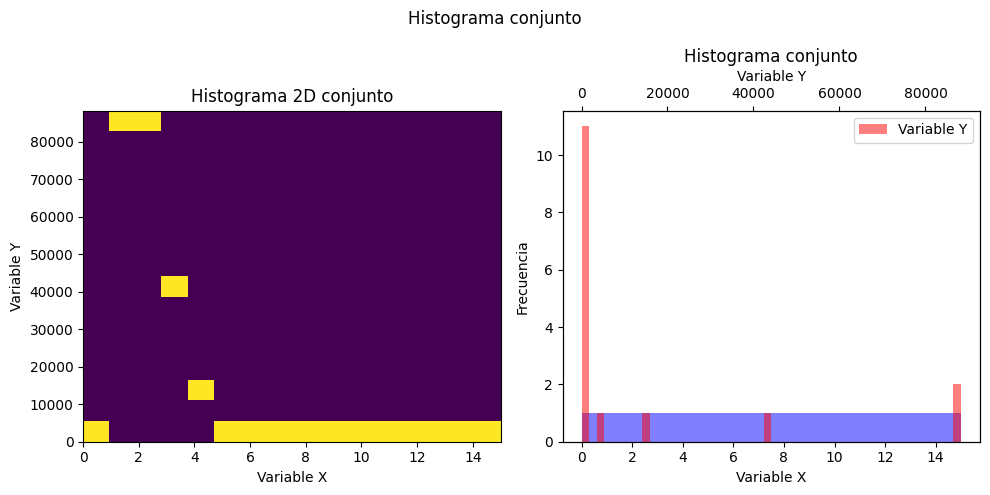

In [12]:
# Apartado H

pintar_histograma_conjunto(np.arange(16),fr_trayectos_k_paradas[0],bins=16)

In [13]:
for tipo in fr_trayectos_k_paradas[:3]:
    pintar_histograma_conjunto(np.arange(16),fr_trayectos_k_paradas[tipo])

TypeError: list indices must be integers or slices, not list

In [14]:
for tipo in fr_trayectos_k_paradas[:3]:
    pintar_histograma_conjunto(np.arange(16),tipo)

TypeError: pintar_histograma_conjunto() missing 1 required positional argument: 'bins'

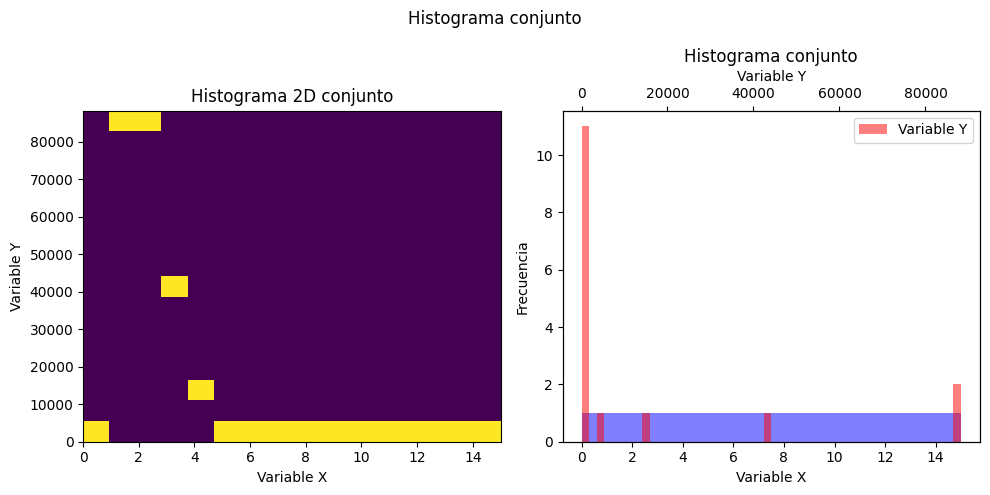

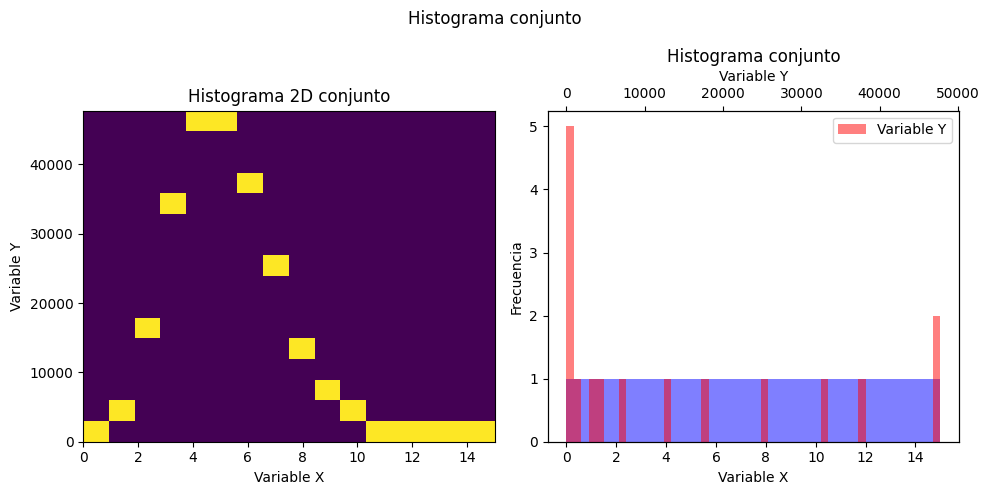

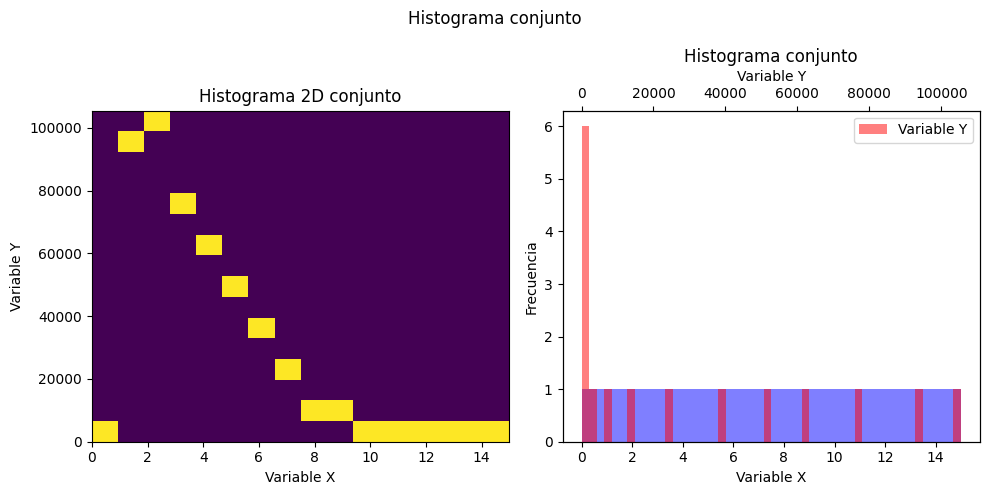

In [15]:
for tipo in fr_trayectos_k_paradas[:3]:
    pintar_histograma_conjunto(np.arange(16),tipo, bins=16)

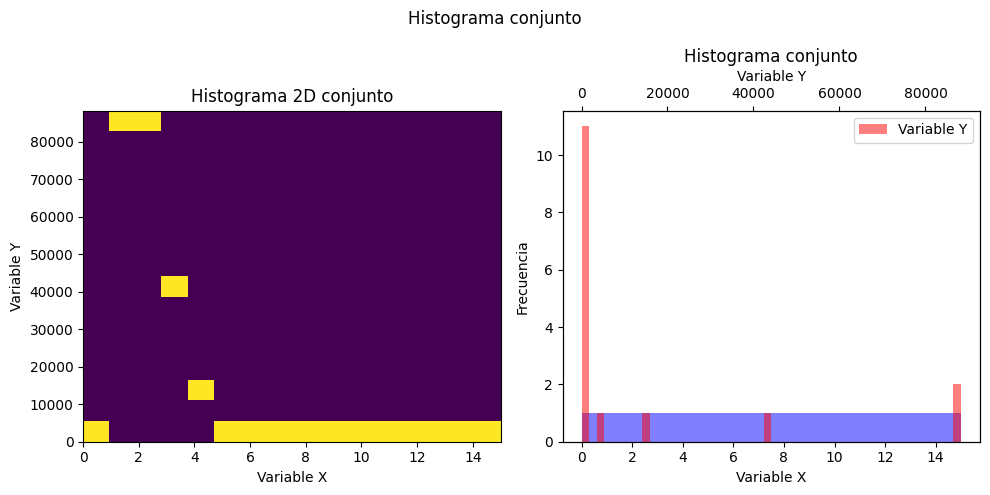

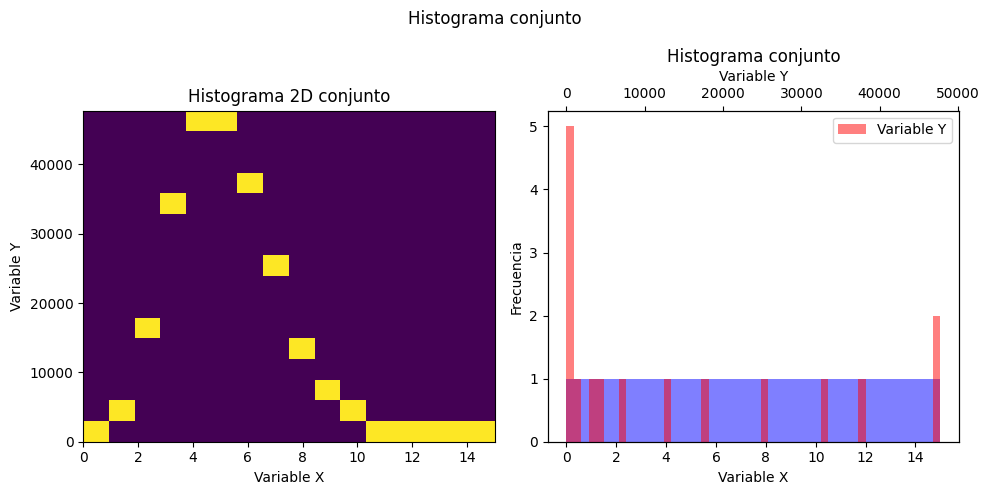

In [16]:
for tipo in fr_trayectos_k_paradas[:2]:
    pintar_histograma_conjunto(np.arange(16),tipo, bins=16)

In [17]:
base = 2
np.emath.log(base, )
precio = []
for i in range(n_desplazamientos):
    precio.append(np.emath.log(base,(1+len(lista_desp[i]))))

TypeError: _unary_dispatcher() takes 1 positional argument but 2 were given

In [18]:
base = 2
np.emath.log(base, )
precio = []
for i in range(n_desplazamientos):
    precio.append(np.emath.log(base,1+len(lista_desp[i])))

TypeError: _unary_dispatcher() takes 1 positional argument but 2 were given

In [19]:
base = 2
np.emath.log(base, )
precio = []
for i in range(n_desplazamientos):
    precio.append(np.emath.log(base,1+len(lista_desp[i])))

TypeError: _unary_dispatcher() takes 1 positional argument but 2 were given

In [20]:
base = 2

precio = []
for i in range(n_desplazamientos):
    precio.append(np.emath.log(base,1+len(lista_desp[i])))

TypeError: _unary_dispatcher() takes 1 positional argument but 2 were given

In [21]:
base = 2

precio = []
for i in range(n_desplazamientos):
    valor = 1+len(lista_desp[i])
    precio.append(np.emath.log(base,valor))

TypeError: _unary_dispatcher() takes 1 positional argument but 2 were given

In [22]:
np.emath.log(2,4)

TypeError: _unary_dispatcher() takes 1 positional argument but 2 were given

In [23]:
np.emath.log(2)

0.6931471805599453

In [24]:
np.emath.log(e)

1.3862943611198906

In [25]:
np.emath.log(10)

2.302585092994046

In [26]:
np.emath.log(2.71)

0.9969486348916096

In [27]:
np.emath.logn(2.71)

TypeError: _logn_dispatcher() missing 1 required positional argument: 'x'

In [28]:
np.emath.logn(2,4)

2.0

In [29]:
base = 2

precio = []
for i in range(n_desplazamientos):
    valor = 1+len(lista_desp[i])
    precio.append(np.emath.logn(base,valor))

In [30]:
precio

[2.321928094887362,
 2.584962500721156,
 2.321928094887362,
 2.584962500721156,
 2.0,
 2.321928094887362,
 1.0,
 2.0,
 2.321928094887362,
 2.0,
 2.321928094887362,
 2.321928094887362,
 2.584962500721156,
 2.584962500721156,
 2.321928094887362,
 1.5849625007211563,
 2.321928094887362,
 2.584962500721156,
 2.321928094887362,
 2.321928094887362,
 2.584962500721156,
 2.584962500721156,
 2.321928094887362,
 1.0,
 2.321928094887362,
 0.0,
 2.0,
 1.5849625007211563,
 2.807354922057604,
 2.584962500721156,
 3.4594316186372978,
 3.0,
 1.5849625007211563,
 2.321928094887362,
 2.584962500721156,
 2.0,
 2.321928094887362,
 1.5849625007211563,
 1.5849625007211563,
 1.5849625007211563,
 1.5849625007211563,
 3.1699250014423126,
 2.321928094887362,
 2.807354922057604,
 2.0,
 2.321928094887362,
 1.5849625007211563,
 2.0,
 3.0,
 1.0,
 2.0,
 2.807354922057604,
 1.5849625007211563,
 2.584962500721156,
 2.0,
 1.0,
 2.584962500721156,
 2.584962500721156,
 2.584962500721156,
 1.5849625007211563,
 1.584962500

In [31]:
precio, lista_desp

([2.321928094887362,
  2.584962500721156,
  2.321928094887362,
  2.584962500721156,
  2.0,
  2.321928094887362,
  1.0,
  2.0,
  2.321928094887362,
  2.0,
  2.321928094887362,
  2.321928094887362,
  2.584962500721156,
  2.584962500721156,
  2.321928094887362,
  1.5849625007211563,
  2.321928094887362,
  2.584962500721156,
  2.321928094887362,
  2.321928094887362,
  2.584962500721156,
  2.584962500721156,
  2.321928094887362,
  1.0,
  2.321928094887362,
  0.0,
  2.0,
  1.5849625007211563,
  2.807354922057604,
  2.584962500721156,
  3.4594316186372978,
  3.0,
  1.5849625007211563,
  2.321928094887362,
  2.584962500721156,
  2.0,
  2.321928094887362,
  1.5849625007211563,
  1.5849625007211563,
  1.5849625007211563,
  1.5849625007211563,
  3.1699250014423126,
  2.321928094887362,
  2.807354922057604,
  2.0,
  2.321928094887362,
  1.5849625007211563,
  2.0,
  3.0,
  1.0,
  2.0,
  2.807354922057604,
  1.5849625007211563,
  2.584962500721156,
  2.0,
  1.0,
  2.584962500721156,
  2.584962500721

In [32]:
precio[:10],lista_desp[:10]

([2.321928094887362,
  2.584962500721156,
  2.321928094887362,
  2.584962500721156,
  2.0,
  2.321928094887362,
  1.0,
  2.0,
  2.321928094887362,
  2.0],
 [[7.985709782357205,
   1.4172160473480786,
   2.4975435309036826,
   0.4352907847391671],
  [6.106711565568784,
   2.995059614818749,
   0.36629943621602956,
   1.6900744429211512,
   0.3209513331641605],
  [1.7229085627245475,
   12.8403764602093,
   0.972674119529184,
   10.467822732645013],
  [1.2124147540507697,
   0.8870469900730968,
   0.7703787819958183,
   7.219922592903088,
   4.099656935749429],
  [3.825779956864695, 2.884558829097807, 1.0543148328768197],
  [0.31629597139011895,
   0.7878332005575632,
   4.7857857520820595,
   1.850872496420715],
  [0.9901770819607405],
  [5.550925842901236, 0.5904461127590825, 0.8688878153800486],
  [1.4556249506398378,
   1.8702043763411402,
   4.650150571894253,
   1.1881201771239813],
  [8.616029305233074, 0.5264867612755688, 0.1791825691513378]])

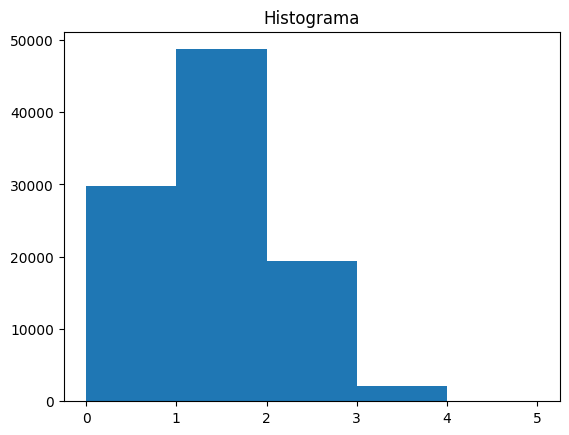

In [33]:
pintar_histograma(precio)

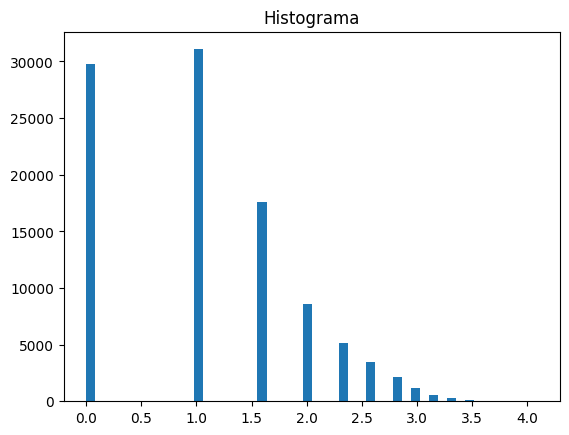

In [34]:
pintar_histograma(precio, bins=50)

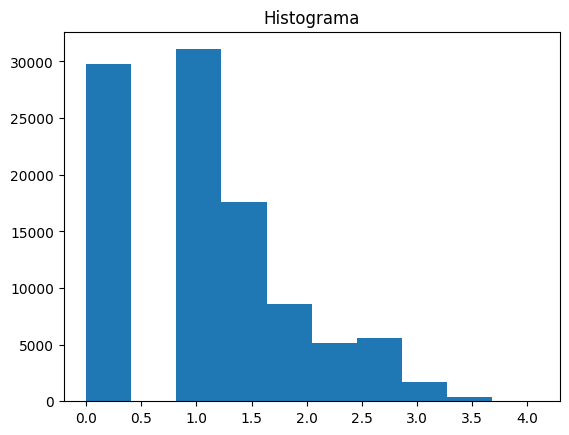

In [35]:
pintar_histograma(precio, bins=10)

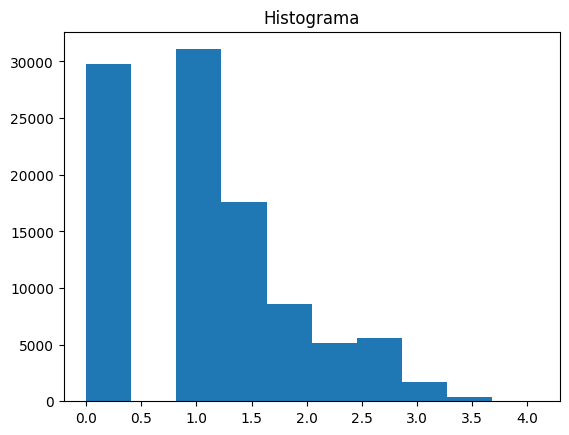

NameError: name 'precios' is not defined

In [36]:
pintar_histograma(precio, bins=10)
print(np.mean(precios))

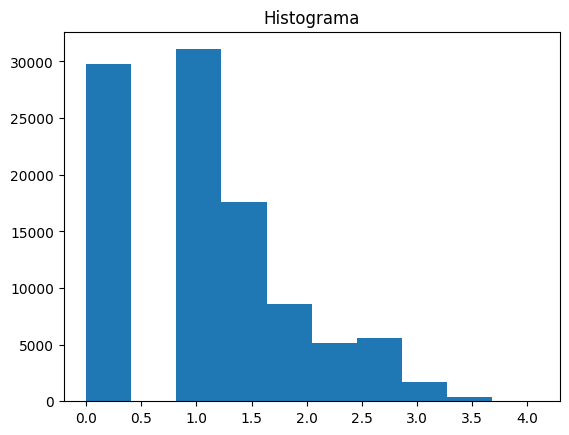

1.0993342707002196


In [37]:
pintar_histograma(precio, bins=10)
print(np.mean(precio))

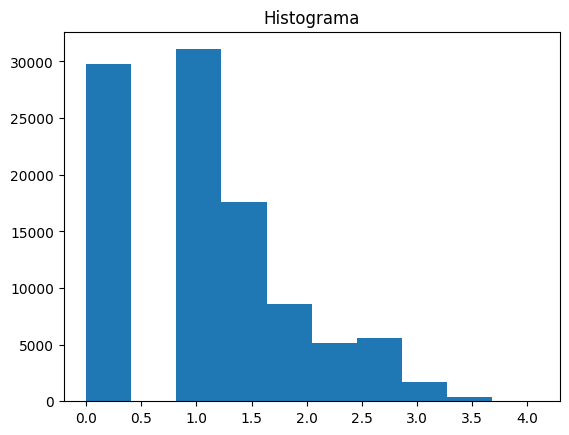

1.0993342707002196 0.7789841969386226


In [38]:
pintar_histograma(precio, bins=10)
print(np.mean(precio),np.var(precio))

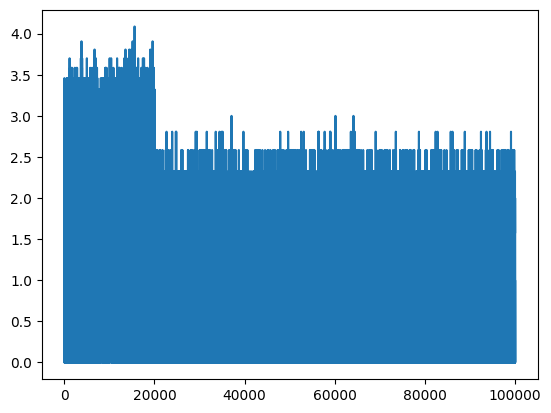

In [39]:
plt.plot(precio)

In [40]:
plt.scatter(precio)

TypeError: scatter() missing 1 required positional argument: 'y'

ValueError: x and y must be the same size

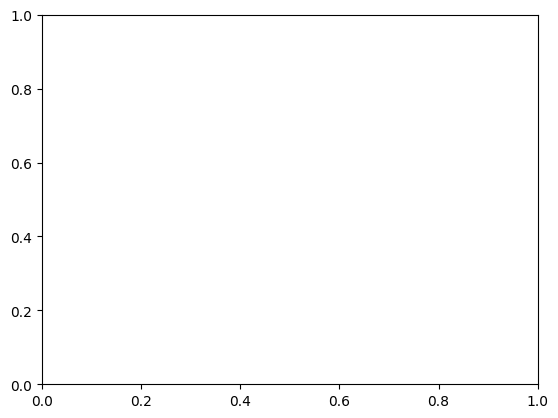

In [41]:
plt.scatter(precio, 16)

ValueError: x and y must be the same size

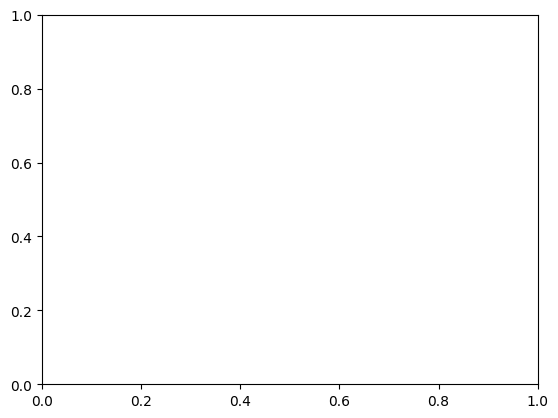

In [42]:
plt.scatter(precio,len(precio))

ValueError: x and y must be the same size

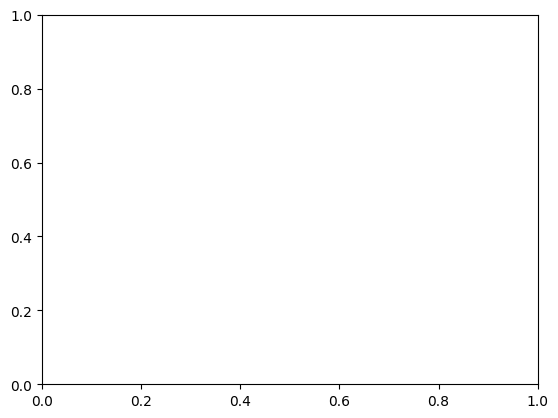

In [43]:
plt.scatter(len(precio),precio)

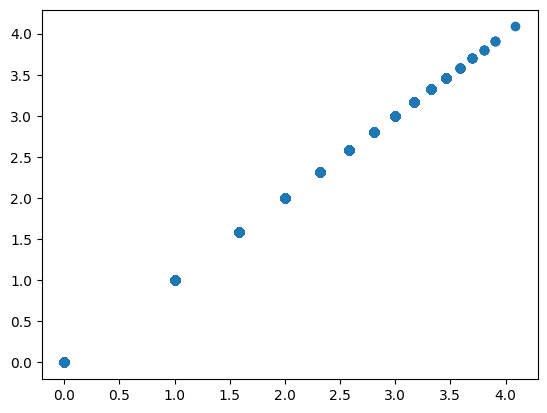

In [44]:
plt.scatter(precio,precio)

In [45]:
len(precio)

100000